In [22]:
import ROOT as R
from ctypes import c_double

fit status:  
****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      -142821
NDf                       =            0
Edm                       =  1.15425e-06
NCalls                    =           64
frac0                     =     0.347646   +/-   0.0200381   
frac1                     =     0.345077   +/-   0.0151858   
frac2                     =     0.307298   +/-   0.0192666   


***** Signal summary *****
Number of signal events =  839.5367822349072 +- 16.175015372998647
 **********
 **   91 **SET PRINT           0
 **********
 **********
 **   92 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac0        3.33333e-01  1.00000e-02     no limits
     2 frac1        3.33333e-01  1.00000e-02     no limits
     3 frac2        3.33333e-01  1.00000e-02     no limits
 **********
 **   93 **SET ERR         0.5
 **********
 **********
 **   94 **SET PRINT           0
 *********

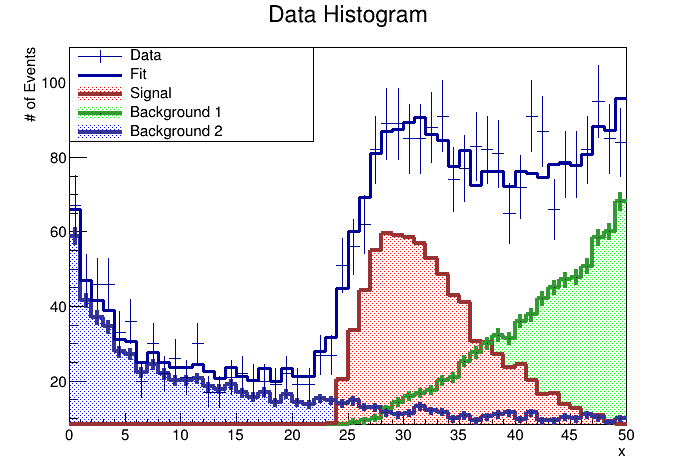

In [46]:
tc=R.TCanvas()

R.gStyle.SetOptStat(R.kFALSE)

tf=R.TFile("mydata.root")  #open histogram file

data=tf.Get("data")   # data histogram
mc0=tf.Get("back1")   # first MC histogram
mc1=tf.Get("back2")   # second MC histogram
msig=tf.Get("signal") # signal model

# build our model, signal and background components
mc = R.TObjArray(3)   # MC histograms are put in this array
mc.Add(mc0)
mc.Add(mc1)
mc.Add(msig)

fit = R.TFractionFitter(data, mc)   # initialize
#fit.Constrain(1,0.0,0.9)           # example to constrain fraction of mc1 to be between 0 and 0.9
#fit.SetRangeX(1,15)                # example to use only the first 15 bins in the fit
status = fit.Fit()                  # perform the fit
print("fit status: ",status)

if status == 0:                     # check on fit status
    result = fit.GetPlot()
    result.SetLineWidth(3)
    data.Draw("Ep")
    result.Draw("same")

params=[c_double()]*3               # neede b/c data are passed by reference below
errors=[c_double()]*3
ndata=data.Integral()
fit.GetResult(0,params[0],errors[0])
fit.GetResult(1,params[1],errors[1])
fit.GetResult(2,params[2],errors[2])

# retrieve the histograms after the fit 
h0=fit.GetMCPrediction(0)
h1=fit.GetMCPrediction(1)
h2=fit.GetMCPrediction(2)

# below we normalize the MC histograms to match the # of events in the data
h0.Scale( 1./h0.Integral() * params[0].value*ndata )
h0.SetLineColor(R.kGreen-2)
h0.SetLineWidth(4)
h00=h0.Clone()
h0.SetFillColor(R.kGreen)
h0.SetFillStyle(3003)

h1.Scale( 1./h1.Integral() * params[1].value*ndata )
h1.SetLineColor(R.kBlue-2)
h1.SetLineWidth(4)
h11=h1.Clone()
h1.SetFillColor(R.kBlue)
h1.SetFillStyle(3003)

h2.Scale( 1./h2.Integral() * params[2].value*ndata )
h2.SetLineColor(R.kRed-2)
h2.SetLineWidth(4)
h22=h2.Clone()
h2.SetFillColor(R.kRed)
h2.SetFillStyle(3003)

# make a stack plot to show the results
hs=R.THStack("hs","stacked MC histograms")
hs.Add(h0)
hs.Add(h1)
hs.Add(h2)

hs.Draw("nostack,same,hist")
h00.Draw("same")
h11.Draw("same")
data.Draw("Ep,same")
result.Draw("same")

leg = R.TLegend(0.1,0.7,0.45,0.9)
leg.AddEntry(data,"Data","EL")
leg.AddEntry(result,"Fit","L")
leg.AddEntry(h2,"Signal")
leg.AddEntry(h0,"Background 1")
leg.AddEntry(h1,"Background 2")

leg.Draw()

print("\n***** Signal summary *****");
print("Number of signal events = ",h2.Integral(),"+-",errors[2].value*h2.Integral())

tc.Draw()